<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Data-Viz" data-toc-modified-id="Data-Viz-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Viz</a></span></li></ul></li><li><span><a href="#Baseline-Regression-Model---OLS-using-Statsmodels" data-toc-modified-id="Baseline-Regression-Model---OLS-using-Statsmodels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Baseline Regression Model - OLS using Statsmodels</a></span><ul class="toc-item"><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#MAE---Mean-Absolute-Error" data-toc-modified-id="MAE---Mean-Absolute-Error-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>MAE - Mean Absolute Error</a></span></li><li><span><a href="#MSE----Mean-Square-Error" data-toc-modified-id="MSE----Mean-Square-Error-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>MSE -  Mean Square Error</a></span></li><li><span><a href="#RMSE---Root-Mean-Square-Error" data-toc-modified-id="RMSE---Root-Mean-Square-Error-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>RMSE - Root Mean Square Error</a></span></li><li><span><a href="#R-Squared" data-toc-modified-id="R-Squared-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>R-Squared</a></span></li></ul></li></ul></li><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Multicollinearity</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling</a></span></li></ul></div>

## Business Problem
1. To develop a model for ACME Real Estate Agency to accurately predict a value of a house based on avaliable data. This will help their clients, either buy or sell their homes at a fair price.
2. To identify if renovations can be made to improve the selling price of the house.

## Methodology
By developing using a Linear Regression model, we will try to predict the selling price of a house based on attributes like size, number of bedrooms/bathroorms etc. Model performance will be evaluated checking for RMSE values

## Dataset
Dataset used will be the King County House Sales dataset : `kc_house_data.csv`

## EDA

In [86]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#for reading spatial data
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [87]:
#importing files
#getting the file from the github repo
url = 'https://raw.githubusercontent.com/rahulakrish/real_estate_analysis/main/kc_house_data.csv'
df = pd.read_csv(url)

#checking the df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


Gathering some info about the df:

In [88]:
print(f'Size of the dataframe is {df.shape}')
print('\n')
df.info()

Size of the dataframe is (21613, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat        

We can see that there is a reasonable amount of data for us to work with.

In [89]:
#dropping the id column since it is irrelevant
df.drop(columns=['id','date'],axis=1,inplace=True)

# #converting the date to date format
# df['date'] = pd.to_datetime(df['date'])

Checking for missing data:

In [90]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We can impute the median for the missing values in sqft_above. Since median is the actual mid-point of the data and unaffected by outlliers, it is a safe choice:

In [91]:
#getting the median
median = df['sqft_above'].median()

#imputing the median value
df['sqft_above'].fillna(median,inplace=True)

#checking to see if it workedb
df.isna().sum().value_counts()

0    19
dtype: int64

### Data Viz

Since location is king in real-estate, let's plot the listings in a map of King's county and highlight the distribution of prices.

For pricing, let's add an extra column to highlight where the price of each house stands in comparision with the median value. When we visualize this data, this could help understand if certain locations are more valuable than others.

First, let's create a pandas Series of the house prices alone:

In [92]:
price = pd.Series(df['price'].describe())
price

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Now, let's create a new column called 'median-range'. Houses that fall within the first quartile range will be labelled as 'QR1'; inter-quartile range as 'IRQ' and the third quartile 'QR3'. Min and max prices will also be highlighted.

In [93]:
#first quartile
df.loc[df['price'] <= price['25%'], 'median_range'] = 'QR1'

#second quartile
df.loc[(df['price'] > price['25%']) & (df['price'] <= price['75%']), 'median_range'] ='IQR'

#third quartile
df.loc[df['price'] >= price['75%'], 'median_range'] = 'QR3'

#min
df.loc[df['price'] == price['min'], 'median_range'] = 'min'

#max
df.loc[df['price'] == price['max'], 'median_range'] = 'max'

By getting a look at the the value_counts of the newly formed 'median_range' column, we can get a fair idea about pricing:

In [94]:
df['median_range'].value_counts()

IQR    10796
QR3     5412
QR1     5403
min        1
max        1
Name: median_range, dtype: int64

Looks like nearly half the dataset has house prices in the inter-quartile range while the first and quartiles are evenly split.

Let's visualize the listings and their respective median_range on a map . This can be done using the `geopandas` library.

In [95]:
# #creating a copy of the df
# mapdf = df.copy()

# #reading the shapefile of Kings County
# king_map = gpd.read_file('Addresses_in_King_County___address_point.shp')

In [96]:
# #defining the co-ordinate system
# crs = {'init': 'EPSG:4326'}

# #setting up points
# geometry = [Point(xy) for xy in zip(mapdf['long'],mapdf['lat'])]
# geo_df = gpd.GeoDataFrame(mapdf,
#                          crs=crs,
#                          geometry=geometry)

# #plotting data
# fig,ax=plt.subplots(figsize=(10,10))
# king_map.to_crs(epsg=4326).plot(ax=ax,color='lightgrey')
# sns.scatterplot(x='long',y='lat',data=mapdf,hue='median_range',ax=ax)
# ax.set_title('Listings Distribution');

While houses with prices in the IQR are somewhat evenly distributed, we can see that the more expensive houses are in the northern part of King's county, while lower priced houses are prevalent in the southern region.

## Baseline Regression Model - OLS using Statsmodels

Statsmodels is a powerful package for statistical analysis in Python. The Ordinary Least Squares regression is a method to estimate the unknown parameters in a linear regression model. It minimizes the sum of squared vertical distances between the observed values and the values predicted by linear approximation.

In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [98]:
#dropping some of the irrelevant columns
df.drop('median_range',axis=1,inplace=True)

In [99]:
#fitting a baseline model using OLS
outcome = 'price'
predictors = df.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum

#fit model to data
model = ols(formula=f,data=df).fit()

In [100]:
predictors_sum

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

In [101]:
#view model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2796.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:06:30   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.73e+06   2.93e+06      2.296      0.022    9.84e+05    1.25e+07
bedrooms      -3.579e+04   1891.984    -18.917      0.000   -3.95e+04   -3.21e+04
bathrooms      4.113e+04   3253.700     12.641      0.000    3.48e+04    4.75e+04
sqft_living    -511.9134    665.255     -0.769      0.442   -1815.863     792.036
sqft_lot          0.1285      0.048      2.682      0.007       0.035       0.222
floors         6693.9138   3595.854      1.862      0.063    -354.226    1.37e+04
waterfront      5.83e+05   1.74e+04     33.581      0.000    5.49e+05    6.17e+05
view           5.286e+04   2140.096     24.698      0.000    4.87e+04    5.71e+04
condition      2.636e+04   2351.554     11.211      0.000    2.18e+04     3.1e+04
grade          9.588e+04   2152.793     44.539      0.000    9.17e+04       1e+05
sqft_above      693.1863    665.288      1.042      0.297    -610.828    1997.201
sqft_basement   662.1335    665.374      0.995      0.320    -642.049    1966.316
yr_built      -2620.6112     72.660    -36.067      0.000   -2763.030   -2478.192
yr_renovated     19.7957      3.656      5.415      0.000      12.630      26.961
zipcode        -582.8066     32.988    -17.667      0.000    -647.465    -518.148
lat            6.028e+05   1.07e+04     56.152      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.348      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6583      3.448      6.282      0.000      14.900      28.416
sqft_lot15       -0.3828      0.073     -5.224      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18382.359   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1867608.902
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.978   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Score

#### MAE - Mean Absolute Error

MAE is the measure of the average size of the mistakes in the predictions of the model, without taking into account their direction

By taking the absolute of the mean difference between the true values and the predicted values of the model, we can calculate the MAE

In [102]:
#getting predicted values
y_preds = model.fittedvalues

#get the mean of the difference between prediction and actual values
model_mae = np.mean(np.abs(df['price'] - y_preds))
model_mae

125916.46049443385

#### MSE -  Mean Square Error

Represents the average of the squared difference of the residuals. Consequently, higher residuals will be penalized more.

In [103]:
#residuals - difference between the predicted and actual price.
# can verify by subtracting y_preds from model.fittedvalues(fittedvalues-predicted values)
# model.resid

#mean square error of the residuals - measures the variance of the residuals
model.mse_resid

40500485207.86817

#### RMSE - Root Mean Square Error

is the square root of the MSE and represents the standard deviation of the residuals.

In [104]:
#root mean square of the residuals - measures the standard devation of the residuals and brings it back to the orignal units
rmse_residuals = np.sqrt(model.mse_resid)
rmse_residuals

201247.32348001096

#### R-Squared

represents the proportion of the variance in the dependent variable that can be explained by the regression model or in the words tells us how well the predictor variables can explain the response variable.

In [105]:
model.rsquared

0.6997622832854795

Approx. 70% of the variance in the price of a house can be expalined by the model using the independent variables.

We can build a function to output the metrics to make things efficient:

In [106]:
def model_metrics(model,model_name):
    mae = round(np.mean(np.abs(model.fittedvalues - df['price'])),2)
  # mse = round(model.mse_resid,2)
  # rmse = round(np.sqrt(model.mse_resid),2)
    rsquared = round(model.rsquared,3)

    metrics = {'MAE' : mae,
             'R-squared' : rsquared}

    metrics_df = pd.DataFrame(metrics,index=[model_name])

    return metrics_df

In [107]:
model_metrics(model,'baseline_model')

,MAE,R-squared
baseline_model,125916.46,0.7


This means that the predicted value of a house is off by approx. $125,000.

We can apply some pre-processing to the data to try and improve model performance

## Multicollinearity

Let's check for correlation between the features. Let's only highlight values greater than 0.5

<Axes: >

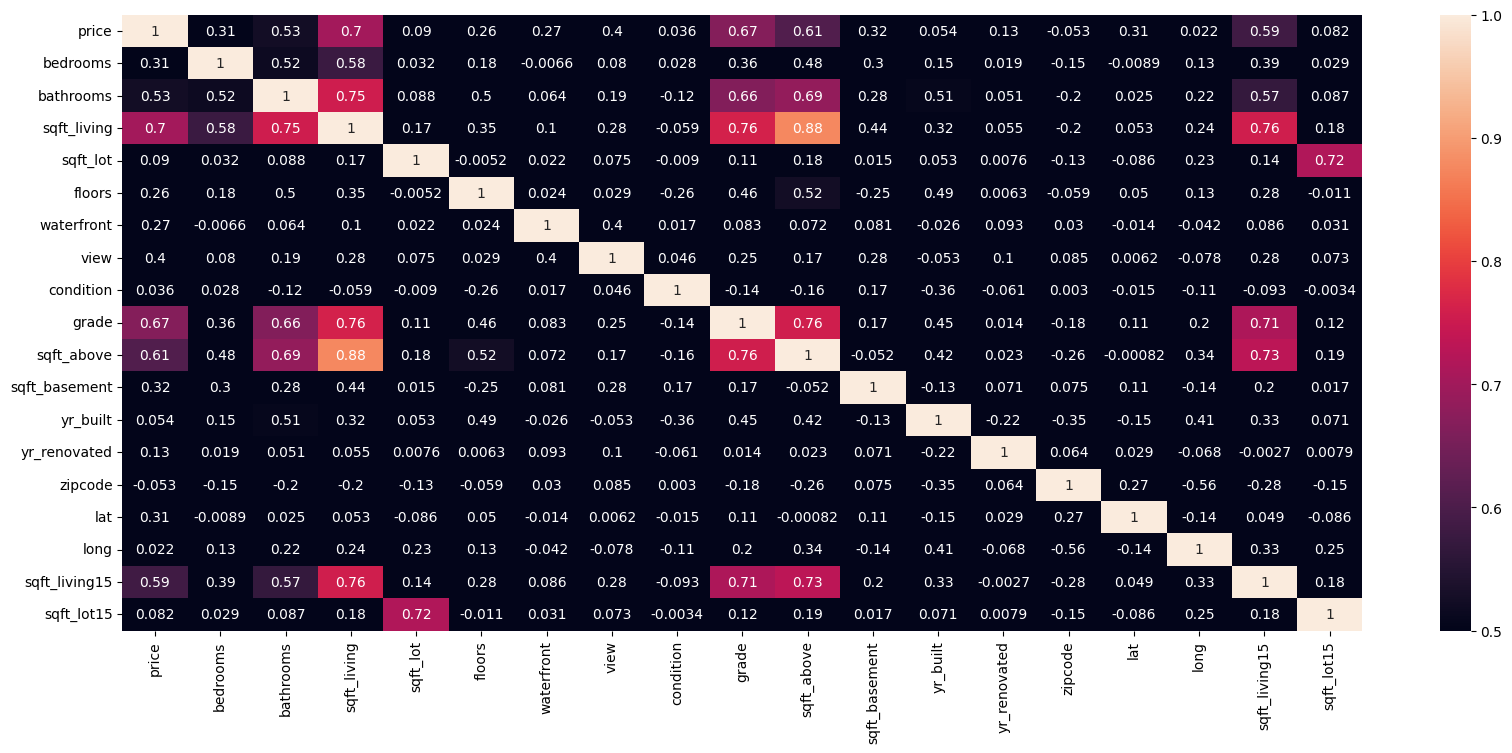

In [108]:
#using seaborn heatmap
fig,ax=plt.subplots(figsize=(20,8))
#setting the min value as 0.5
sns.heatmap(df.corr(),annot=True,vmin=0.5)

We can see sqft-living and sqft_lot are highly correlated. As is the case with sqft_living and sqft_above. Let's build a model by dropping some these features and check for performance

In [109]:
df.drop(['sqft_living15','sqft_lot15','sqft_above'],axis=1,inplace=True)

In [110]:
#fitting a new model
outcome = 'price'
predictors = df.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum

#fit model to data
model1 = ols(formula=f,data=df).fit()

In [111]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3341.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:06:32   Log-Likelihood:            -2.9463e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21597   BIC:                         5.894e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       9.32e+06   2.88e+06      3.231      0.001    3.67e+06     1.5e+07
bedrooms      -3.547e+04   1892.408    -18.745      0.000   -3.92e+04   -3.18e+04
bathrooms        4.1e+04   3255.640     12.593      0.000    3.46e+04    4.74e+04
sqft_living     189.1382      3.354     56.391      0.000     182.564     195.712
sqft_lot         -0.0528      0.035     -1.519      0.129      -0.121       0.015
floors         4890.1954   3575.607      1.368      0.171   -2118.259    1.19e+04
waterfront      5.79e+05   1.74e+04     33.318      0.000    5.45e+05    6.13e+05
view           5.486e+04   2116.216     25.925      0.000    5.07e+04     5.9e+04
condition      2.563e+04   2352.719     10.892      0.000     2.1e+04    3.02e+04
grade          9.989e+04   2065.839     48.353      0.000    9.58e+04    1.04e+05
sqft_basement   -34.5561      4.320     -7.999      0.000     -43.024     -26.089
yr_built      -2638.1992     72.726    -36.276      0.000   -2780.748   -2495.651
yr_renovated     18.3739      3.655      5.027      0.000      11.209      25.539
zipcode        -602.5850     32.885    -18.324      0.000    -667.042    -538.128
lat            6.072e+05   1.07e+04     56.572      0.000    5.86e+05    6.28e+05
long          -2.079e+05   1.29e+04    -16.060      0.000   -2.33e+05   -1.83e+05
==============================================================================
Omnibus:                    18129.036   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1753416.717
Skew:                           3.500   Prob(JB):                         0.00
Kurtosis:                      46.567   Cond. No.                     2.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Score

In [112]:
model_metrics(model1,'model1')

,MAE,R-squared
model1,126148.38,0.699


In [113]:
np.sqrt(model1.mse_resid)

201535.02303068314

Looks like the model got slightly worse.

Let's try a different approach

## Scaling

If the independent variables all have different scales, then this could lead to misinterpretation i.e. features represented on a larger scale might have larger coefficents. By making the scale uniform across the data set, this will help improve model performance.

In [134]:
df1 = df.copy()
cols = list(df1.columns)
cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long']

In [138]:
cols.remove

In [115]:
from sklearn.preprocessing import MinMaxScaler

#initialize the scaler
scaler = MinMaxScaler()

#fit the scaler on the data
scaled = scaler.fit_transform(df[cols])

# scale_df.head()
scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.89393939, 0.57149751,
        0.21760797],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.62626263, 0.90895931,
        0.16611296],
       [0.06060606, 0.125     , 0.03622642, ..., 0.13636364, 0.93614283,
        0.23754153],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.72222222, 0.70532411,
        0.18272425],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.13131313, 0.60897539,
        0.37375415],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.72222222, 0.70484156,
        0.18272425]])

In [116]:
scaled_df = pd.DataFrame(data=scaled,columns=cols)
scaled_df = pd.concat([df['price'],scaled_df],axis=1)
scaled_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608
1,538000.0,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113
2,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542
3,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651
4,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688


As we can see, all the values are between 0 and 1.
Let's fit a model on the scaled data and see what the results are:

In [117]:
#fitting a new model
outcome = 'price'
predictors = scaled_df.drop('price',axis=1)
predictors_sum = '+'.join(predictors.columns)

f = outcome + '~' + predictors_sum

#fit model to data
model2 = ols(formula=f,data=scaled_df).fit()

In [118]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3341.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:06:32   Log-Likelihood:            -2.9463e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21597   BIC:                         5.894e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.509e+05    1.5e+04    -30.122      0.000    -4.8e+05   -4.22e+05
bedrooms      -1.171e+06   6.24e+04    -18.745      0.000   -1.29e+06   -1.05e+06
bathrooms       3.28e+05    2.6e+04     12.593      0.000    2.77e+05    3.79e+05
sqft_living    2.506e+06   4.44e+04     56.391      0.000    2.42e+06    2.59e+06
sqft_lot      -8.716e+04   5.74e+04     -1.519      0.129      -2e+05    2.53e+04
floors         1.223e+04   8939.018      1.368      0.171   -5295.647    2.97e+04
waterfront      5.79e+05   1.74e+04     33.318      0.000    5.45e+05    6.13e+05
view           2.194e+05   8464.863     25.925      0.000    2.03e+05    2.36e+05
condition      1.025e+05   9410.878     10.892      0.000    8.41e+04    1.21e+05
grade          1.199e+06   2.48e+04     48.353      0.000    1.15e+06    1.25e+06
sqft_basement -1.666e+05   2.08e+04     -7.999      0.000   -2.07e+05   -1.26e+05
yr_built      -3.034e+05   8363.490    -36.276      0.000    -3.2e+05   -2.87e+05
yr_renovated   3.702e+04   7365.449      5.027      0.000    2.26e+04    5.15e+04
zipcode       -1.193e+05   6511.234    -18.324      0.000   -1.32e+05   -1.07e+05
lat            3.775e+05   6673.343     56.572      0.000    3.64e+05    3.91e+05
long          -2.503e+05   1.56e+04    -16.060      0.000   -2.81e+05    -2.2e+05
==============================================================================
Omnibus:                    18129.036   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1753416.717
Skew:                           3.500   Prob(JB):                         0.00
Kurtosis:                      46.567   Cond. No.                         82.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Score

In [119]:
model_metrics(model2,'model2')

,MAE,R-squared
model2,126148.38,0.699


In [120]:
np.sqrt(model2.mse_resid)

201535.0230306831

## Log-Transformation

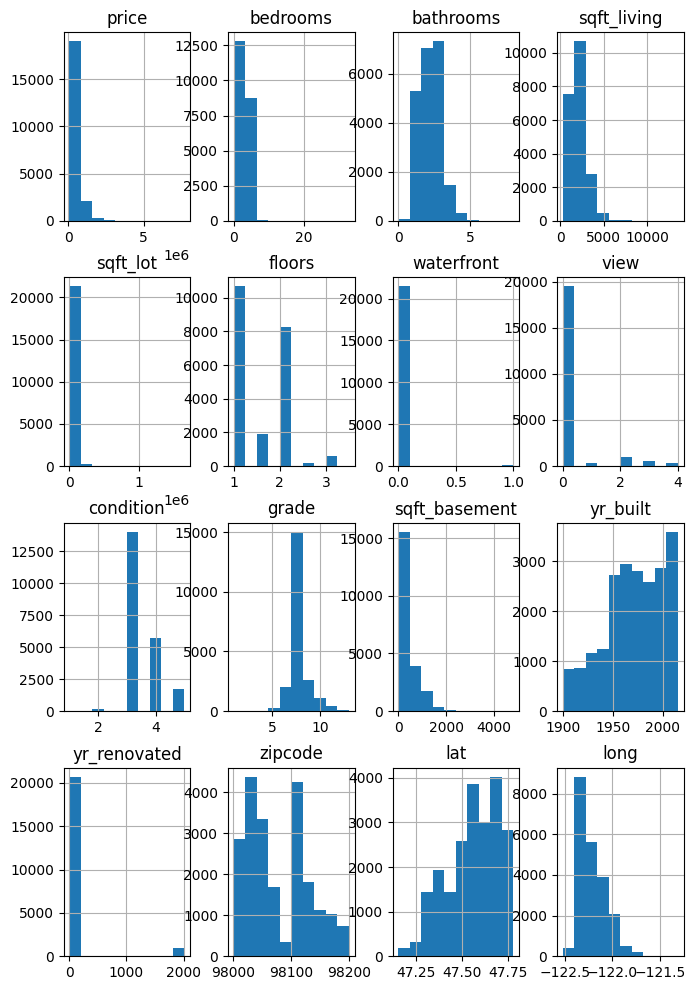

In [121]:
fig,ax=plt.subplots(figsize=(8,12))
pd.plotting.hist_frame(df,ax=ax);